# James Baker 177005622 Lab \#4

Collaboration Policy

    1. Study groups are allowed but I expect students to understand and complete their own 
    assignments and to hand in one assignment per student.
    2. If you worked in a group, please put the names of your study group on your assignment 
    on top.
    3. Just like all other classes at Rutgers, the student Honor Code is taken seriously.
    
    The submitted assignmenst must be your work.

## <font color = blue> Assignment </font>

Use the water consumption data to estimate a simple regression model.  The water consumption data was introduced at the beginning of the semester and is available on Sakai.  The unknown parameters of a demand function have to be estimated.  Estimate a simple OLS model real per capita water consumption as a function of the real price per gallon.  No other variables are to be used since the purpose of this lab is just to have you become familiar with commands.

# <font color = red> Documentation </font>

## <font color = blue> Abstract </font>

*In this lab, I learned that per capita water consumption is statistically related to the real price per gallon of water. According to the OLS model estimated, for every 1 dollar increase in price per gallon, per capita consumption would decrease by 8425.809311. This is in line with theory, that higher prices entail lower quantity bought. The relationship is not perfectly linear; there are residuals, as there may be other factors that may affect demand for water not explained by the model. *

## <font color = blue> Data Dictionary </font>

| Variable | Values   | Source | Mnemonic |
|----------|----------|--------|---------|
| Aggregate Consumption | Millions of gallons, annual | Int'l Bottled Water | agg_consumption |
| Aggregate Revenue | Millions of dollars, annual/nominal | IBID. | agg_revenue |
| Per Capita Consumption | Gallons per person, annual | Calculated: agg_consumption/pop | per_capita_consump |
| Nominal Price per Gallon | Nominal dollars | Calculated: agg_revenue/agg_cons. | price |
| Real Disposable Income per Capita | Real dollars, base = 2005, annual | Economic R. of Pres. 2010, Tbl. B-31 | real_dis_income |
| Food CPI | Index (Total Food & Beverages) | Economic R. of Pres. 2010, Tbl. B-60 |food_cpi |
| Population | Millions | Economic R. of Pres. 2010, Tbl. B-34 | pop |
| Real Price per Gallon | Real dollars, annual | Calculated: price/food_cpi | real_price  |

# <font color = red> Tasks </font>

## <font color = blue> Load the Pandas and Statsmodels packages and give them aliases.  I recommend 'pd' and 'sm'.  You will also need the Statsmodels formula API for formulas.  Please see Lesson \#4 for examples.</font>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import seaborn as sns

## <font color = blue> Import the water consumption data.  Set the row index to the years. </font>

In [3]:
df=pd.read_csv("water.csv")
df.set_index("obs")

,agg_consumption,per_capita_cons,food_cpi,pop,price,real_price,agg_revenue,real_dis_income
obs,,,,,,,,
1993,2689.4,10.333711,141.600,260.255,1.069644,0.007554,2876.7,24044
1994,2966.4,11.260420,144.900,263.436,1.066714,0.007362,3164.3,24517
1995,3226.9,12.101314,148.900,266.657,1.091419,0.007330,3521.9,24951
1996,3495.1,12.960800,153.700,269.667,1.097365,0.007140,3835.4,25475
1997,3794.3,13.903016,157.700,272.912,1.112906,0.007057,4222.7,26061
1998,4130.7,14.960071,161.100,276.115,1.129615,0.007012,4666.1,27299
1999,4583.4,16.410605,164.600,279.295,1.159554,0.007045,5314.7,27805
2000,4725.0,16.732475,168.400,282.385,1.293757,0.007683,6113.0,28899
2001,5185.2,18.176656,173.600,285.267,1.326969,0.007644,6880.6,29299


## <font color = blue> Print the first five (5) records. </font>

In [4]:
df.head()

,obs,agg_consumption,per_capita_cons,food_cpi,pop,price,real_price,agg_revenue,real_dis_income
0,1993,2689.4,10.333711,141.6,260.255,1.069644,0.007554,2876.7,24044
1,1994,2966.4,11.260420,144.9,263.436,1.066714,0.007362,3164.3,24517
2,1995,3226.9,12.101314,148.9,266.657,1.091419,0.007330,3521.9,24951
3,1996,3495.1,12.960800,153.7,269.667,1.097365,0.007140,3835.4,25475
4,1997,3794.3,13.903016,157.7,272.912,1.112906,0.007057,4222.7,26061


## Graph

[Text(0,0.5,'Per Capita Consumption'),
 Text(0.5,0,'Real Price'),
 Text(0.5,1,'Real Price vs. Per Capita Consumption')]

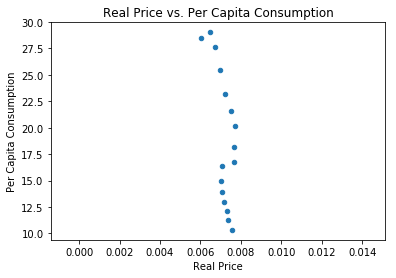

In [5]:
ax = df.plot( x = 'real_price', y = 'per_capita_cons', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Real Price', ylabel = 'Per Capita Consumption', title = 'Real Price vs. Per Capita Consumption' )

## <font color = blue> Estimate an OLS model using per capita consumption as the dependent variable and real price as the the independent variable.  Display the summary report.  See Lesson \#4 for an example.</font>

In [14]:
formula="per_capita_cons ~ 1"
mod = smf.ols( formula, data = df )
reg01 = mod.fit()
reg01.summary()

/Users/jamesbaker/miniconda3/envs/py3k/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/jamesbaker/miniconda3/envs/py3k/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_capita_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Nov 2018   Prob (F-statistic):                nan
Time:                        22:14:17   Log-Likelihood:                -51.771
No. Observations:                  16   AIC:                             105.5
Df Residuals:                      15   BIC:                             106.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8948      1.588     11.895      0.000      15.509      22.280
==============================================================================
Omnibus:                        2.838   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.305
Skew:                           0.311   Prob(JB):                        0.521
Kurtosis:                       1.747   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Descriptives

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obs,16.0,2000.500000,4.760952,1993.000000,1996.750000,2000.500000,2004.250000,2008.000000
agg_consumption,16.0,5430.256250,2073.808994,2689.400000,3719.500000,4955.100000,6989.750000,8757.400000
per_capita_cons,16.0,18.894761,6.353614,10.333711,13.667462,17.454565,23.772322,29.025501
food_cpi,16.0,172.676562,21.470518,141.600000,156.700000,171.000000,187.750000,214.225000
pop,16.0,283.061750,13.984216,260.255000,272.100750,283.826000,293.981000,304.483000
price,16.0,1.229393,0.117783,1.066714,1.109021,1.291871,1.327086,1.363321
real_price,16.0,0.007154,0.000463,0.006022,0.006995,0.007179,0.007539,0.007711
agg_revenue,16.0,6861.737500,3058.035940,2876.700000,4125.875000,6496.800000,9378.900000,11551.500000
real_dis_income,16.0,28669.500000,2992.882334,24044.000000,25914.500000,29099.000000,31224.250000,32648.000000


## <font color = blue> Retrieve and display the estimated parameters.  See Lesson \#4 for an example.</font>

### Params

In [8]:
reg01.params

Intercept    18.894761
dtype: float64

### Sum of Squares Residuals

In [9]:
sse = reg01.ssr
sse

605.5260727661479

### Standard Error

In [10]:
se_reg = np.sqrt( sse/( reg01.nobs - 2 ) )
round( se_reg, 2 )

6.58

### SSX

In [11]:
sxx = ( ( df.real_price - df.real_price.mean() ) **2 ).sum()
print( sxx )

3.211004985479043e-06


### Standard Error of the Beta 1 Estimate

In [12]:
se_beta_1 = se_reg/np.sqrt( sxx )
se_beta_1

3670.1339583277468

### Sum of Residuals

In [13]:
round( reg01.resid.sum(), 4 )

-0.0